In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading dataset
df=pd.read_csv('city_day.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
df=df[df['Date']>=('2020-01-01')]
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
1826,Ahmedabad,2020-01-01,79.57,131.62,3.78,12.64,8.99,NaN,3.78,27.70,23.67,4.21,31.42,2.52,216.0,Poor
1827,Ahmedabad,2020-01-02,72.59,128.86,3.63,14.38,9.73,NaN,3.63,23.96,23.67,3.71,31.14,2.52,162.0,Moderate
1828,Ahmedabad,2020-01-03,69.54,128.99,7.06,15.13,12.65,NaN,7.06,35.78,23.66,4.78,31.14,2.52,220.0,Poor
1829,Ahmedabad,2020-01-04,66.20,138.47,8.97,20.79,16.84,NaN,8.97,38.98,23.65,4.12,31.14,2.52,254.0,Poor
1830,Ahmedabad,2020-01-05,55.99,110.41,5.41,15.34,11.53,NaN,5.41,45.83,23.61,3.30,31.14,2.52,255.0,Poor


In [4]:
df.reset_index(drop=True,inplace=True)
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2020-01-01,79.57,131.62,3.78,12.64,8.99,NaN,3.78,27.70,23.67,4.21,31.42,2.52,216.0,Poor
1,Ahmedabad,2020-01-02,72.59,128.86,3.63,14.38,9.73,NaN,3.63,23.96,23.67,3.71,31.14,2.52,162.0,Moderate
2,Ahmedabad,2020-01-03,69.54,128.99,7.06,15.13,12.65,NaN,7.06,35.78,23.66,4.78,31.14,2.52,220.0,Poor
3,Ahmedabad,2020-01-04,66.20,138.47,8.97,20.79,16.84,NaN,8.97,38.98,23.65,4.12,31.14,2.52,254.0,Poor
4,Ahmedabad,2020-01-05,55.99,110.41,5.41,15.34,11.53,NaN,5.41,45.83,23.61,3.30,31.14,2.52,255.0,Poor


In [5]:
for i in df.columns:
    print('column names:{} unique values : {}'.format(i,len(df[i].unique())))

column names:City unique values : 26
column names:Date unique values : 183
column names:PM2.5 unique values : 3447
column names:PM10 unique values : 3762
column names:NO unique values : 2370
column names:NO2 unique values : 2776
column names:NOx unique values : 2941
column names:NH3 unique values : 2489
column names:CO unique values : 369
column names:SO2 unique values : 1898
column names:O3 unique values : 3080
column names:Benzene unique values : 926
column names:Toluene unique values : 1360
column names:Xylene unique values : 457
column names:AQI unique values : 382
column names:AQI_Bucket unique values : 7


In [6]:
# Data preprocessing - Filling the missing values by their mean
df['PM2.5']=df['PM2.5'].fillna(df['PM2.5'].mean())
df['PM10']=df['PM10'].fillna(df['PM10'].mean())
df['NO']=df['NO'].fillna(df['NO'].mean())
df['NO2']=df['NO2'].fillna(df['NO2'].mean())
df['NOx']=df['NOx'].fillna(df['NOx'].mean())
df['NH3']=df['NH3'].fillna(df['NH3'].mean())
df['CO']=df['CO'].fillna(df['CO'].mean())
df['SO2']=df['SO2'].fillna(df['SO2'].mean())
df['O3']=df['O3'].fillna(df['O3'].mean())
df['Benzene']=df['Benzene'].fillna(df['Benzene'].mean())
df['Toluene']=df['Toluene'].fillna(df['Toluene'].mean())
df['Xylene']=df['Xylene'].fillna(df['Xylene'].mean())
df['AQI']=df['AQI'].fillna(df['AQI'].mode()[0])
df['AQI_Bucket']=df['AQI_Bucket'].fillna('Moderate')

In [7]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2020-01-01,79.57,131.62,3.78,12.64,8.99,18.962005,3.78,27.70,23.67,4.21,31.42,2.52,216.0,Poor
1,Ahmedabad,2020-01-02,72.59,128.86,3.63,14.38,9.73,18.962005,3.63,23.96,23.67,3.71,31.14,2.52,162.0,Moderate
2,Ahmedabad,2020-01-03,69.54,128.99,7.06,15.13,12.65,18.962005,7.06,35.78,23.66,4.78,31.14,2.52,220.0,Poor
3,Ahmedabad,2020-01-04,66.20,138.47,8.97,20.79,16.84,18.962005,8.97,38.98,23.65,4.12,31.14,2.52,254.0,Poor
4,Ahmedabad,2020-01-05,55.99,110.41,5.41,15.34,11.53,18.962005,5.41,45.83,23.61,3.30,31.14,2.52,255.0,Poor


In [8]:
# Data preprocessing - Removing Outliers
df['AQI']=np.where(df['AQI']>500,df['AQI'].mean(),df['AQI'])
df[df['AQI']>500]

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket


In [9]:
df['AQI'].describe()

count    4646.000000
mean      109.148152
std        68.931737
min        14.000000
25%        67.000000
50%        90.000000
75%       128.000000
max       493.000000
Name: AQI, dtype: float64

In [10]:
most_polluted = df[['City', 'PM2.5', 'AQI']].groupby(['City']).mean().sort_values(by='AQI', ascending=False)

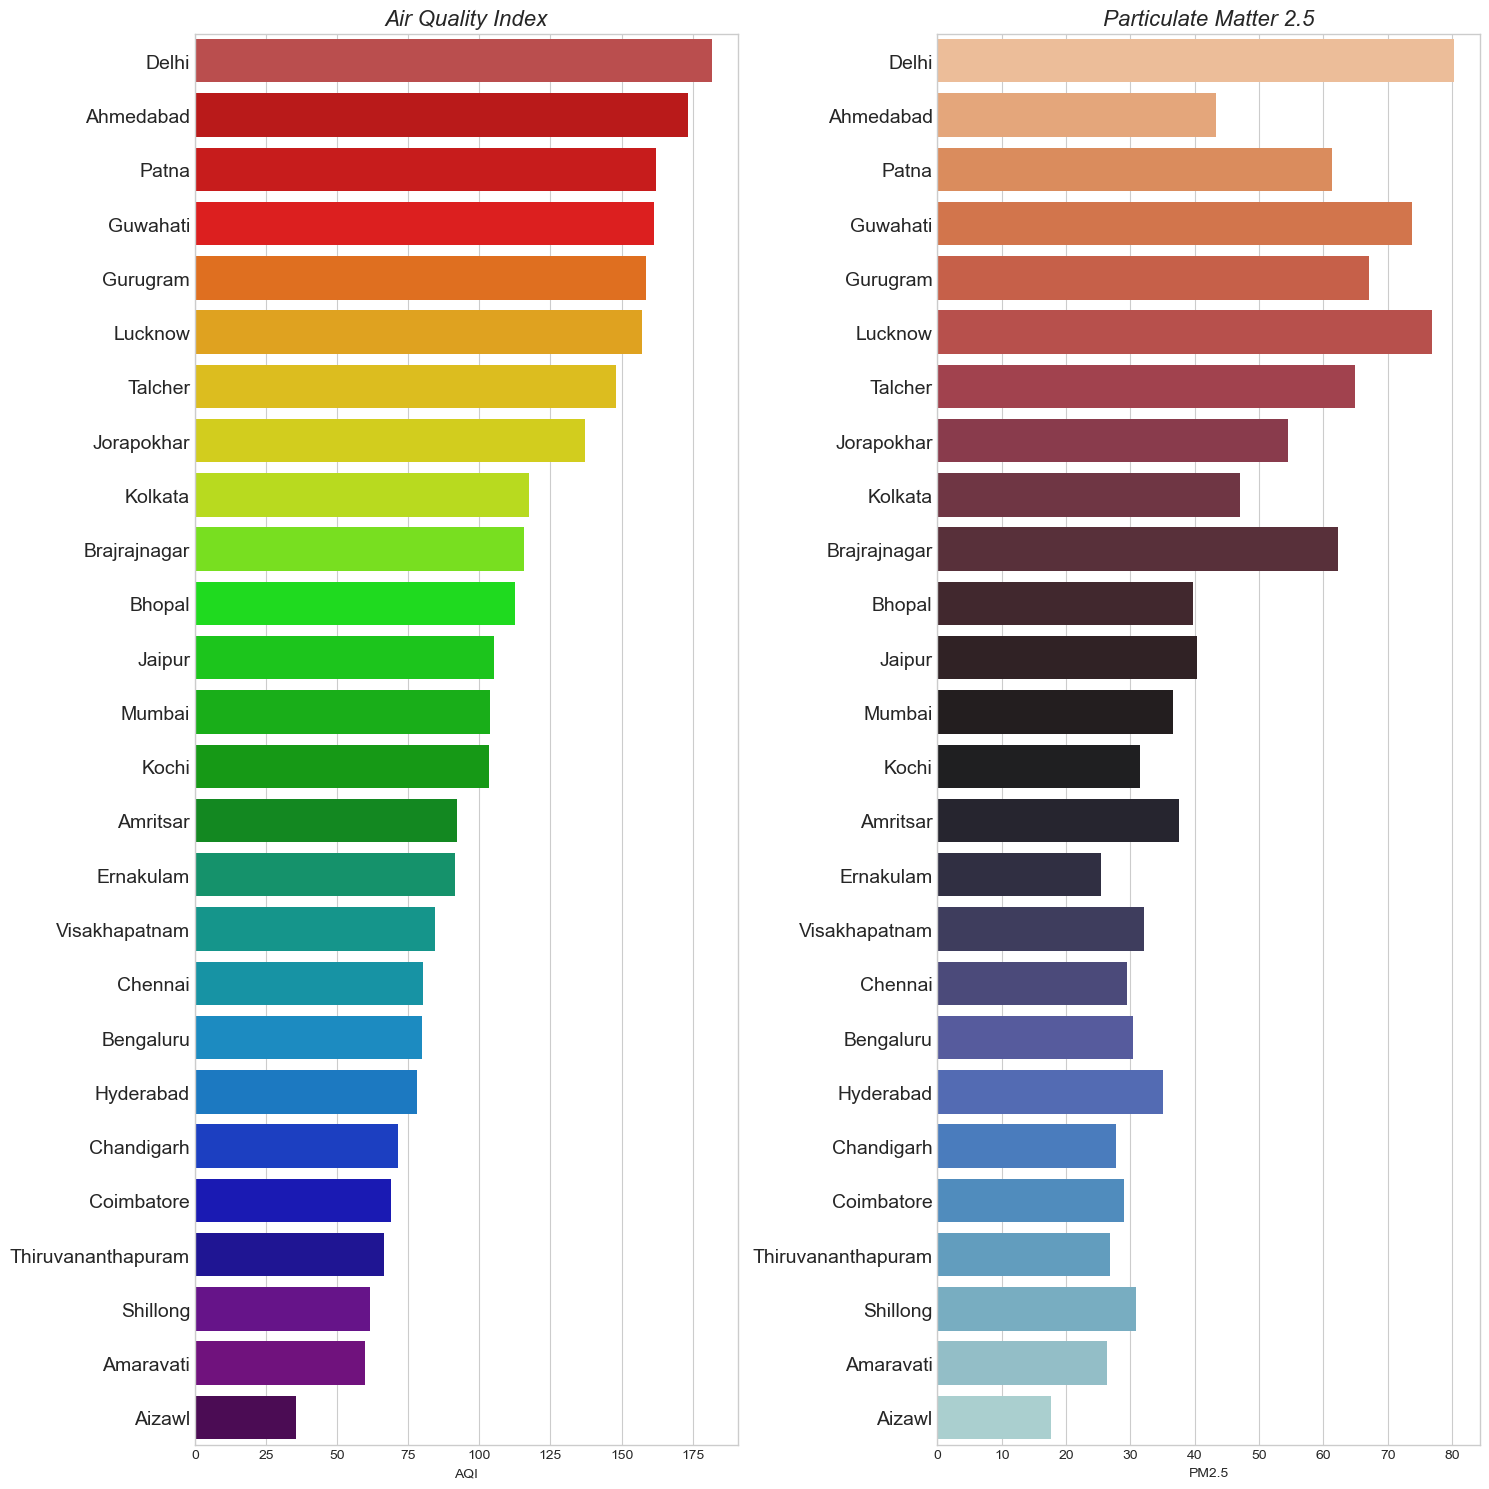

In [11]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(15,15))
bar1 = sns.barplot(x = most_polluted.AQI,
                   y = most_polluted.index,
                   palette = 'nipy_spectral_r',
                   ax = ax[0]);

bar1 = sns.barplot(x = most_polluted['PM2.5'],
                   y = most_polluted.index,
                   palette = 'icefire_r',
                   ax = ax[1]);
titles = ['Air Quality Index', 'Particulate Matter 2.5']
for i in range(2) :
    ax[i].set_ylabel('')
    ax[i].set_yticklabels(labels = ax[i].get_yticklabels(),fontsize = 14);
    ax[i].set_title(titles[i],fontsize=16,style='italic')
    fig.tight_layout()
plt.savefig('bar.jpeg')

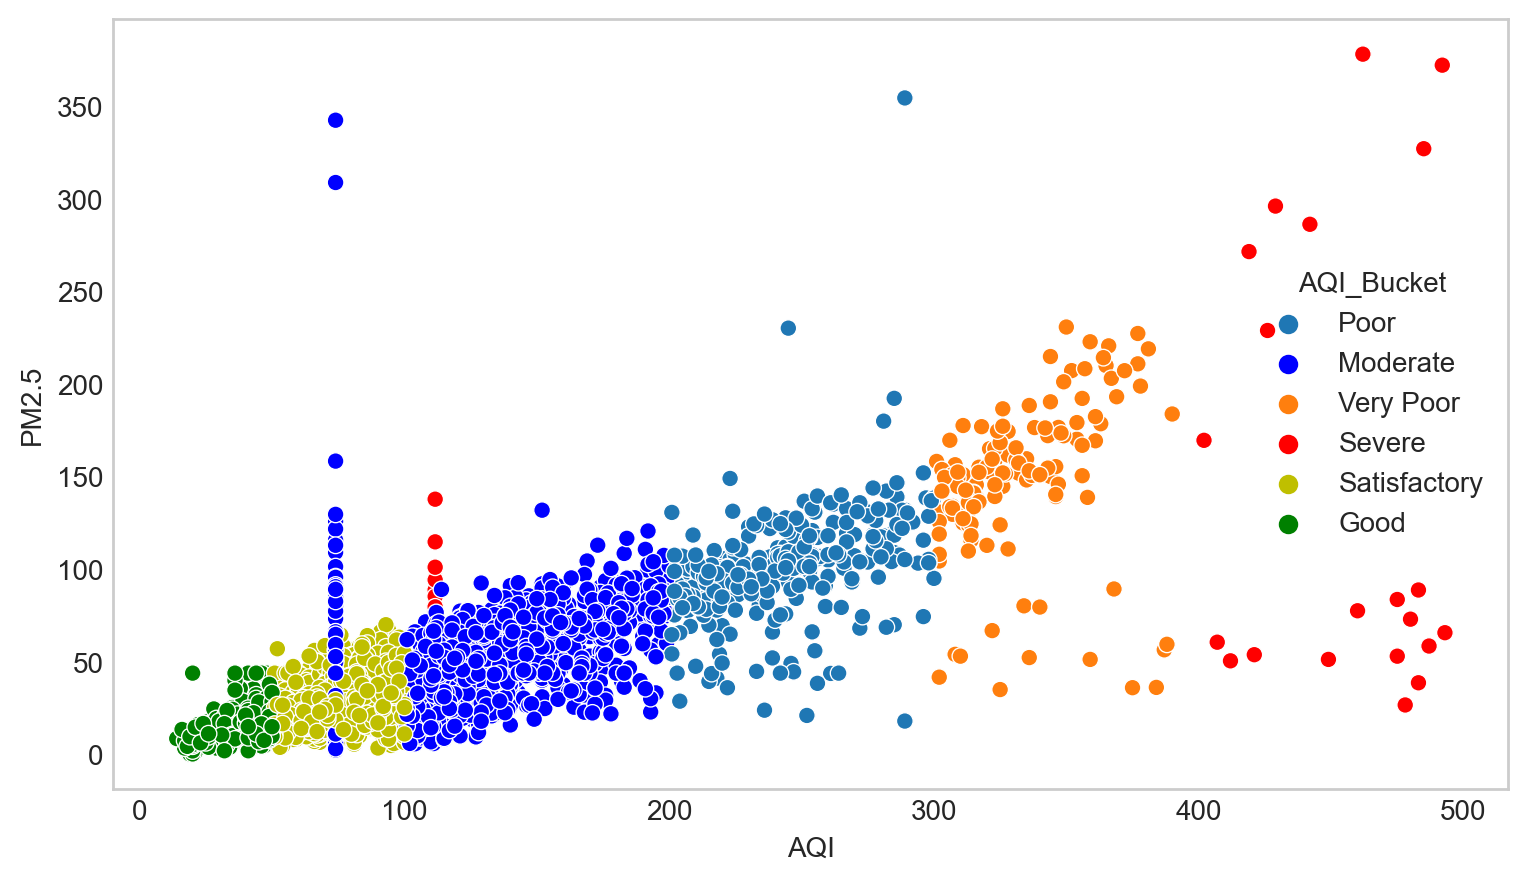

In [12]:
plt.figure(figsize=(9,5),dpi=200)
palette ={'Good': "g", 'Poor': "C0", 'Very Poor': "C1",'Severe': "r","Moderate": 'b',"Satisfactory":'y'}
ax=sns.scatterplot(x= 'AQI', y= 'PM2.5', data=df,hue ='AQI_Bucket',palette = palette)
ax.grid(False)
plt.savefig('scatterplot_AQI.jpeg')

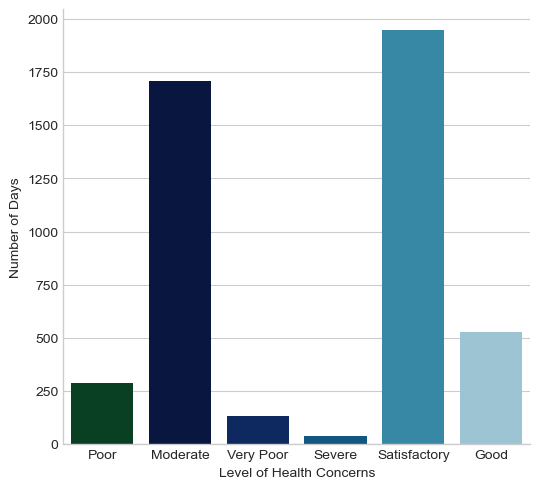

In [13]:
cat=sns.catplot(x = "AQI_Bucket", kind= "count", palette = "ocean", height=5, aspect=1.1, data = df)
cat.set(xlabel='Level of Health Concerns',ylabel='Number of Days')
plt.savefig('catplot_AQI.jpg')

In [14]:
df1=df.copy()
df1.drop(['PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI_Bucket'],axis='columns',inplace=True)
df1.head()

,City,Date,PM2.5,AQI
0,Ahmedabad,2020-01-01,79.57,216.0
1,Ahmedabad,2020-01-02,72.59,162.0
2,Ahmedabad,2020-01-03,69.54,220.0
3,Ahmedabad,2020-01-04,66.20,254.0
4,Ahmedabad,2020-01-05,55.99,255.0


In [15]:
df1['Day_date']=pd.to_datetime(df1['Date'],format='%Y/%m/%d').dt.day
df1['month_date']=pd.to_datetime(df1['Date'],format='%Y/%m/%d').dt.month
df1.drop(['Date'],axis=1,inplace=True)
df1.head()

,City,PM2.5,AQI,Day_date,month_date
0,Ahmedabad,79.57,216.0,1,1
1,Ahmedabad,72.59,162.0,2,1
2,Ahmedabad,69.54,220.0,3,1
3,Ahmedabad,66.20,254.0,4,1
4,Ahmedabad,55.99,255.0,5,1


In [16]:
df1=pd.get_dummies(df1,drop_first=True)
df1.head()

,PM2.5,AQI,Day_date,month_date,City_Aizawl,City_Amaravati,City_Amritsar,City_Bengaluru,City_Bhopal,City_Brajrajnagar,...,City_Jorapokhar,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam
0,79.57,216.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,72.59,162.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.54,220.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,66.20,254.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,55.99,255.0,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df1.fillna(df1['AQI'].mean(),inplace=True)

In [18]:
X = df1.drop(['AQI'],axis=1)
y=df1['AQI']

In [19]:
# Splitting dataset into train dataset and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [20]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [21]:
model.score(X_train,y_train)*100

96.18718182958837

In [22]:
model.score(X_test,y_test)*100

77.91063501375861

In [23]:
model1 = RandomForestRegressor()
model1.fit(df1[['PM2.5']],df1['AQI'])

RandomForestRegressor()

In [24]:
model1.predict([[40]])

c:\Users\HARIS BALAJI\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([60.8547619])

In [25]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

In [26]:
model_lr.score(X_train,y_train)*100

75.1533636371381

In [27]:
model_lr.score(X_test,y_test)*100

78.78154010856133

In [28]:
#Saving model into file
import joblib
joblib.dump(model1,'rf_AQI')

['rf_AQI']